In [8]:
import sympy as sp
import control
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
s, z = sp.symbols('s, z')

In [13]:
gs = 1/(s*(s+2))
display(sp.Eq(sp.Function(sp.Symbol('G'))(s), gs))
num = 1
den = 1/gs
num_li = [1]
den_li = [1, 2, 0]
print(f'{num_li = }, {den_li = }')

Eq(G(s), 1/(s*(s + 2)))

num_li = [1], den_li = [1, 2, 0]


In [59]:
print("projeto do controlador em s para satisfazer os pré-requisitos csi=0.7 e ta = 2s:")
print('Utilizando a seguinte aproximação para ta:')
Csi, Wn, ta = sp.Symbol('Csi'), sp.Symbol('Wn'), sp.Symbol('ta')
display(sp.Eq(ta, 3.9/(Csi*Wn)))
print('como csi=0.7 é um pré requisito, podemos estimar Wn:')
display(sp.Eq(Wn, 3.9/(Csi*ta)))
display(sp.Eq(Wn, (3.9/(Csi*ta)).subs(Csi, 0.7).subs(ta, 2)))
print(f'Com csi=0.7 e Wn=2.78571428571429')
print('Assim, para que o sistema seja estável em malha fechada, seu denominador deve ser:')

den_ideal = s**2 + 3.9*s + 2.78571428571429**2
display(den_ideal)
print(den_ideal)


projeto do controlador em s para satisfazer os pré-requisitos csi=0.7 e ta = 2s:
Utilizando a seguinte aproximação para ta:


Eq(ta, 3.9/(Csi*Wn))

como csi=0.7 é um pré requisito, podemos estimar Wn:


Eq(Wn, 3.9/(Csi*ta))

Eq(Wn, 2.78571428571429)

Com csi=0.7 e Wn=2.78571428571429
Assim, para que o sistema seja estável em malha fechada, seu denominador deve ser:


s**2 + 3.9*s + 7.76020408163268

s**2 + 3.9*s + 7.76020408163268


In [60]:
print("solucionando para os polos, obtemos:")
polos = sp.solve(den_ideal, s)
display(sp.Eq(sp.symbols('s_1'), polos[0]))
sp.Eq(sp.symbols('s_2'), polos[1])


solucionando para os polos, obtemos:


Eq(s_1, -1.95 - 1.98939791937979*I)

Eq(s_2, -1.95 + 1.98939791937979*I)

In [70]:
print('logo:')
T = sp.Symbol('T')
z1 = sp.exp(polos[0]*T)
z2 = sp.exp(polos[1]*T)
display(sp.Eq(sp.Symbol('z1'), z1))
print(sp.Eq(sp.Symbol('z1'), z1))
display(sp.Eq(sp.Symbol('z2'), z2))
print(sp.Eq(sp.Symbol('z2'), z2))

print('substituindo seno e coseno:')
z1 = sp.exp(-1.95*T)*sp.cos(T*1.98939791937979) - sp.exp(-1.95*T)*sp.sin(T*1.98939791937979)*sp.I
z2 = sp.exp(-1.95*T)*sp.cos(T*1.98939791937979) + sp.exp(-1.95*T)*sp.sin(T*1.98939791937979)*sp.I
display(sp.Eq(sp.Symbol('z1'), z1))
display(sp.Eq(sp.Symbol('z2'), z2))

print('assim, para T=0.2s:')

z1 = z1.subs(T, 0.2)
z2 = z2.subs(T, 0.2)

display(sp.Eq(sp.Symbol('z1'), z1))
display(sp.Eq(sp.Symbol('z2'), z2))


logo:


Eq(z1, exp(T*(-1.95 - 1.98939791937979*I)))

Eq(z1, exp(T*(-1.95 - 1.98939791937979*I)))


Eq(z2, exp(T*(-1.95 + 1.98939791937979*I)))

Eq(z2, exp(T*(-1.95 + 1.98939791937979*I)))
substituindo seno e coseno:


Eq(z1, -I*exp(-1.95*T)*sin(1.98939791937979*T) + exp(-1.95*T)*cos(1.98939791937979*T))

Eq(z2, I*exp(-1.95*T)*sin(1.98939791937979*T) + exp(-1.95*T)*cos(1.98939791937979*T))

assim, para T=0.2s:


Eq(z1, 0.624168340925144 - 0.262335459844788*I)

Eq(z2, 0.624168340925144 + 0.262335459844788*I)

In [79]:
print("Sendo a função de transferência discreta do processo:")
a = 2
gz = (1/4)*(
    (
        (
            (a*T-1+sp.exp(-a*T)) +
            ( 1 - sp.exp(-a*T) - a*T*sp.exp(-a*T) )*(z**-1)
        )*(z**-1)
    )
    /
    (
        ( (1 - (z**-1))**2 ) *
        ( 1 - sp.exp(-a*T)*(z**-1) )
    )
) * (1-(z**-1))
display(sp.Eq(sp.Function("G")(z), gz))
print('substituindo T, temos:')
gz = gz.subs(T, 0.2)
display(sp.Eq(sp.Function("G")(z), gz.simplify()))
gz_simp = gz.simplify().expand().simplify()
display(sp.Eq(sp.Function("G")(z), gz_simp))
print(gz_simp)
gz_num_li =[0.0175800115089098, 0.0153879838875262]
gz_den_li = [1, 1.67032004603564, 0.67032004603564]
print(f'{gz_num_li = }, {gz_den_li = }')

Sendo a função de transferência discreta do processo:


Eq(G(z), 0.25*(2*T - 1 + exp(-2*T) + (-2*T*exp(-2*T) + 1 - exp(-2*T))/z)/(z*(1 - 1/z)*(1 - exp(-2*T)/z)))

substituindo T, temos:


Eq(G(z), (0.0175800115089098*z + 0.0153879838875262)/((z - 1)*(z - 0.670320046035639)))

Eq(G(z), (0.0175800115089098*z + 0.0153879838875262)/(z**2 - 1.67032004603564*z + 0.670320046035639))

(0.0175800115089098*z + 0.0153879838875262)/(z**2 - 1.67032004603564*z + 0.670320046035639)
gz_num_li = [0.0175800115089098, 0.0153879838875262], gz_den_li = [1, 1.67032004603564, 0.67032004603564]


In [77]:
print('Considerando o seguinte polinômio característico desejado:')
desired_caract_poli = ((z-z1)*(z-z2)).simplify()
display(sp.Eq(sp.Function(sp.Symbol('F_d'))(z), desired_caract_poli))

print('A função de transferência do processo G(z) tem grau n=2. O controlador Gc(z) deve ter grau m>= n-1. Assim, assumindo m=1, a função de transferência do controlador é do tipo:')
K, C1, C2 = sp.symbols('K, C_1, C_2')
gc = K*(z+C1)/(z+C2)
display(sp.Eq(sp.Function(sp.Symbol('G_c'))(z), gc))

Considerando o seguinte polinômio característico desejado:


Eq(F_d(z), 1.0*z**2 - 1.24833668185029*z + 0.458406011305224)

A função de transferência do processo G(z) tem grau n=2. O controlador Gc(z) deve ter grau m>= n-1. Assim, assumindo m=1, a função de transferência do controlador é do tipo:


Eq(G_c(z), K*(C_1 + z)/(C_2 + z))

In [91]:
print('desta forma, a função de transferência de malha aberta é dada por:')
gma = (gz*gc).simplify()
display(sp.Eq(sp.Function(sp.Symbol('G_ma'))(z), gma))
# print(gma)
print('Supondo que o zero do controlador cancela o polo estável da planta (C1 = -0.670320046035639), temos:')
gma = gma.subs((C1+z), 1).subs(1/gma.args[3], 1)
display(sp.Eq(sp.Function(sp.Symbol('G_ma'))(z), gma))


desta forma, a função de transferência de malha aberta é dada por:


Eq(G_ma(z), 0.25*K*(C_1 + z)*(0.0703200460356393*z + 0.0615519355501049)/((C_2 + z)*(z - 1)*(z - 0.670320046035639)))

Supondo que o zero do controlador cancela o polo estável da planta (C1 = -0.670320046035639), temos:


Eq(G_ma(z), 0.25*K*(0.0703200460356393*z + 0.0615519355501049)/((C_2 + z)*(z - 1)))

In [96]:
print('Com isso, podemos fazer a função de transferênicia discreta em malha fechada:')
gmf = (gma/(1+gma)).simplify().expand().simplify()
display(sp.Eq(sp.Function(sp.Symbol('G_mf'))(z), gmf))

Com isso, podemos fazer a função de transferênicia discreta em malha fechada:


Eq(G_mf(z), K*(0.0175800115089098*z + 0.0153879838875262)/(C_2*z - C_2 + 0.0175800115089098*K*z + 0.0153879838875262*K + z**2 - z))

In [102]:
print('Comparando o plonomio característico de Gmf com o desejado, temos:')
sol_k_c2 = sp.solve((1/gmf.args[1])- desired_caract_poli, (K, C2))
display(sol_k_c2)
print('substituindo os resultados em Gc e Gmf:')
gc_solved = gc.subs(sol_k_c2).subs(C1, -0.670320046035639)
gmf_solved = gmf.subs(sol_k_c2)
display(sp.Eq(sp.Function(sp.Symbol('G_c'))(z), gc_solved))
display(sp.Eq(sp.Function(sp.Symbol('G_mf'))(z), gmf_solved))


Comparando o plonomio característico de Gmf com o desejado, temos:


{K: 6.37191697368550, C_2: -0.360355055581497}

substituindo os resultados em Gc e Gmf:


Eq(G_c(z), 6.3719169736855*(z - 0.670320046035639)/(z - 0.360355055581497))

Eq(G_mf(z), 6.3719169736855*(0.0175800115089098*z + 0.0153879838875262)/(z**2 - 1.24833668185029*z + 0.458406011305224))

Análise dos resultados:
6.3719169736855*(0.0175800115089098*z + 0.0153879838875262)/(z**2 - 1.24833668185029*z + 0.458406011305224)
{'RiseTime': 4.0, 'SettlingTime': 11.0, 'SettlingMin': 0.927109859102365, 'SettlingMax': 1.0459590844935736, 'Overshoot': 4.5959084493564495, 'Undershoot': 0, 'Peak': 1.0459590844935736, 'PeakTime': 8.0, 'SteadyStateValue': 1.0000000000000087}


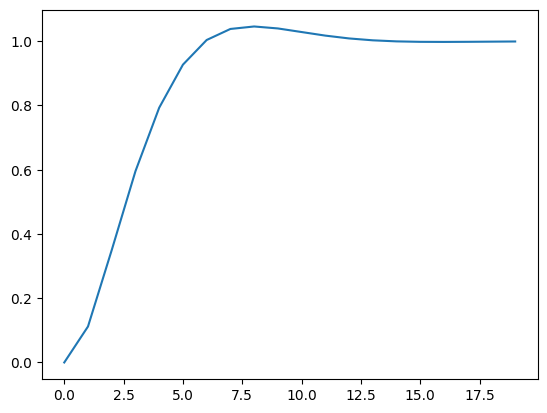

TransferFunction(array([0.11201837, 0.09805096]), array([ 1.        , -1.24833668,  0.45840601]), True)

In [113]:
print('Análise dos resultados:')

ctrl_z = control.tf('z')
print(gmf_solved)
gmf_ctrl = 6.3719169736855*(0.0175800115089098*ctrl_z + 0.0153879838875262)/(ctrl_z**2 - 1.24833668185029*ctrl_z + 0.458406011305224)
print(control.step_info(gmf_ctrl))


def plot_print_tf(tf):
    step = control.step_response(tf)
    # pd.Series(step.inputs, index=step.time).plot()
    pd.Series(step.outputs, index=step.time).plot()
    plt.show()
    display(tf)
plot_print_tf(gmf_ctrl)